# ÖDEV7
# Öğrenci No: 171024011
# Öğrenci Adı ve Soyadı: Yağmur Derya

In [1]:
# gerekli tanımlamalar yapıldı
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as sgnl
from scipy.fftpack import fft, ifft

import zplane

from scipy.io import loadmat # filtre bilgilerini okuyabilmek için tanımlandı

%matplotlib notebook

pi = np.pi
cos = np.cos
sin = np.sin

## SORU-1

In [2]:
N = 100                         # 100 noktada FT hesaplayabilmek için
w = np.linspace(0, 2*pi, N)     # omega (0, 2*pi arasında) tanımlandı

### Type-I

In [3]:
# M çift sayı olmalı
# M = 4 => n = 0, 1, 2, 3, 4 => h[n] 5 elemanlı
h_1 = np.ones(5)                     # 5 örnek her birinin genliği 1
n_1 = np.arange(0, 5)

# Fourier Transform
Hw_1 = fft(h_1, N)

Hw_1_abs = abs(Hw_1)                 # genlik
Hw_1_phs = np.unwrap(np.angle(Hw_1)) # faz
T_w1 = -np.diff(Hw_1_phs)*(N/(2*pi)) # grup gecikmesi

<IPython.core.display.Javascript object>


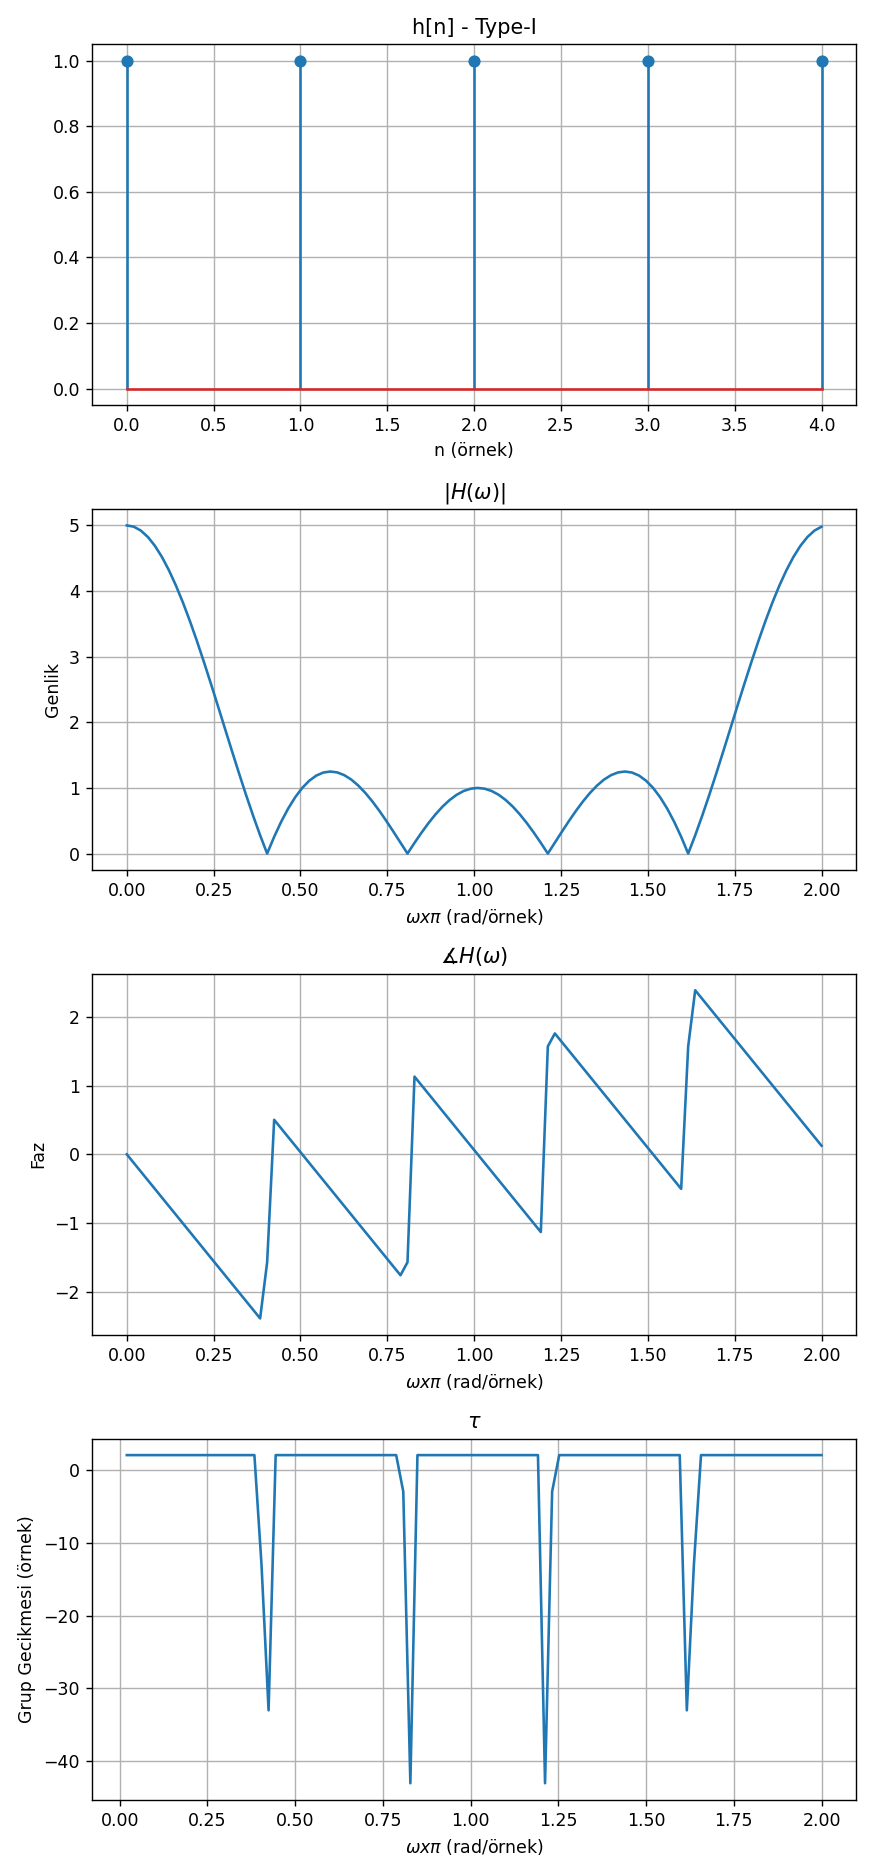

In [4]:
# grafiklerin çizdirilmesi
plt.figure(figsize=(7, 15)) # yeni figür

plt.subplot(4, 1, 1) # h[n]
plt.title('h[n] - Type-I'), plt.xlabel('n (örnek)'), plt.stem(n_1, h_1), plt.grid()

plt.subplot(4, 1, 2) # genlik
plt.title('$|H(\omega)|$'), plt.ylabel('Genlik'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w/pi, Hw_1_abs), plt.grid()

plt.subplot(4, 1, 3) # faz
plt.title('$\measuredangle H(\omega)$'), plt.ylabel('Faz'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w/pi, Hw_1_phs), plt.grid()

plt.subplot(4, 1, 4) # grup gecikmesi
plt.title('$\\tau$'), plt.ylabel('Grup Gecikmesi (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w[1::]/pi, T_w1), plt.grid() 

plt.tight_layout()
plt.show()

Hem alçak frekans 0'da hem de yüksek frekans $\pi$'de sıfırdan farklı bi değer almıştır. Bu sebeple LPF, HPF ve BPF olarak çalışabileceği görülmektedir. $(-\pi, \pi)$ aralığında da BPF olabilir. Derste edilen bilgilerden de Type-I filtrenin 4 tip filtre olarak da çalışabileceği bilinmektedir. Bu Type-I filtre ($0, \pi$) aralığı için LPF olarak çalışır. 

Filtrenin fazının lineer olduğu grafikten görülmektedir. Bazı noktalarda grup gecikmesinin sabitliğinin bozulduğu görülmektedir. Bunun sebebi o noktalarda fazın eğiminin değişmesidir fakat genele bakıldığında grup gecikmesi sabit olup 2 örnek olduğu görülmektedir.

<IPython.core.display.Javascript object>


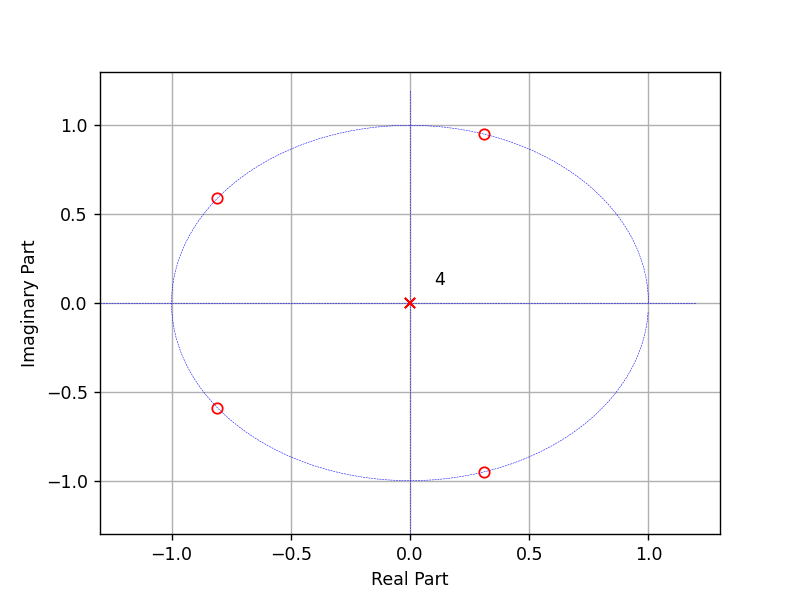

In [5]:
# kutup-sıfır diyagramı
zplane.zplane(h_1, 1)

$z=\pm 1$ noktalarında sıfırların olması belli frekans değerlerinde sınırlandırmalara sebep olduğu için, bu noktalardaki sıfırlar filtre tasarımı için önemlidir. Filtre bu noktalarda sıfırlara sahip olmadığı için, frekans sınırlandırılması bulunmayacağından 4 tip filtre olarak da çalışabilir.

### Type-II

In [6]:
# M tek sayı olmalı
# M = 3 => n = 0, 1, 2, 3 => h[n] 4 elemanlı
h_2 = np.ones(4)                     # 5 örnek her birinin genliği 1
n_2 = np.arange(0, 4)

# Fourier Transform
Hw_2 = fft(h_2, N)

Hw_2_abs = abs(Hw_2)                 # genlik
Hw_2_phs = np.unwrap(np.angle(Hw_2)) # faz
T_w2 = -np.diff(Hw_2_phs)*(N/(2*pi)) # grup gecikmesi

<IPython.core.display.Javascript object>


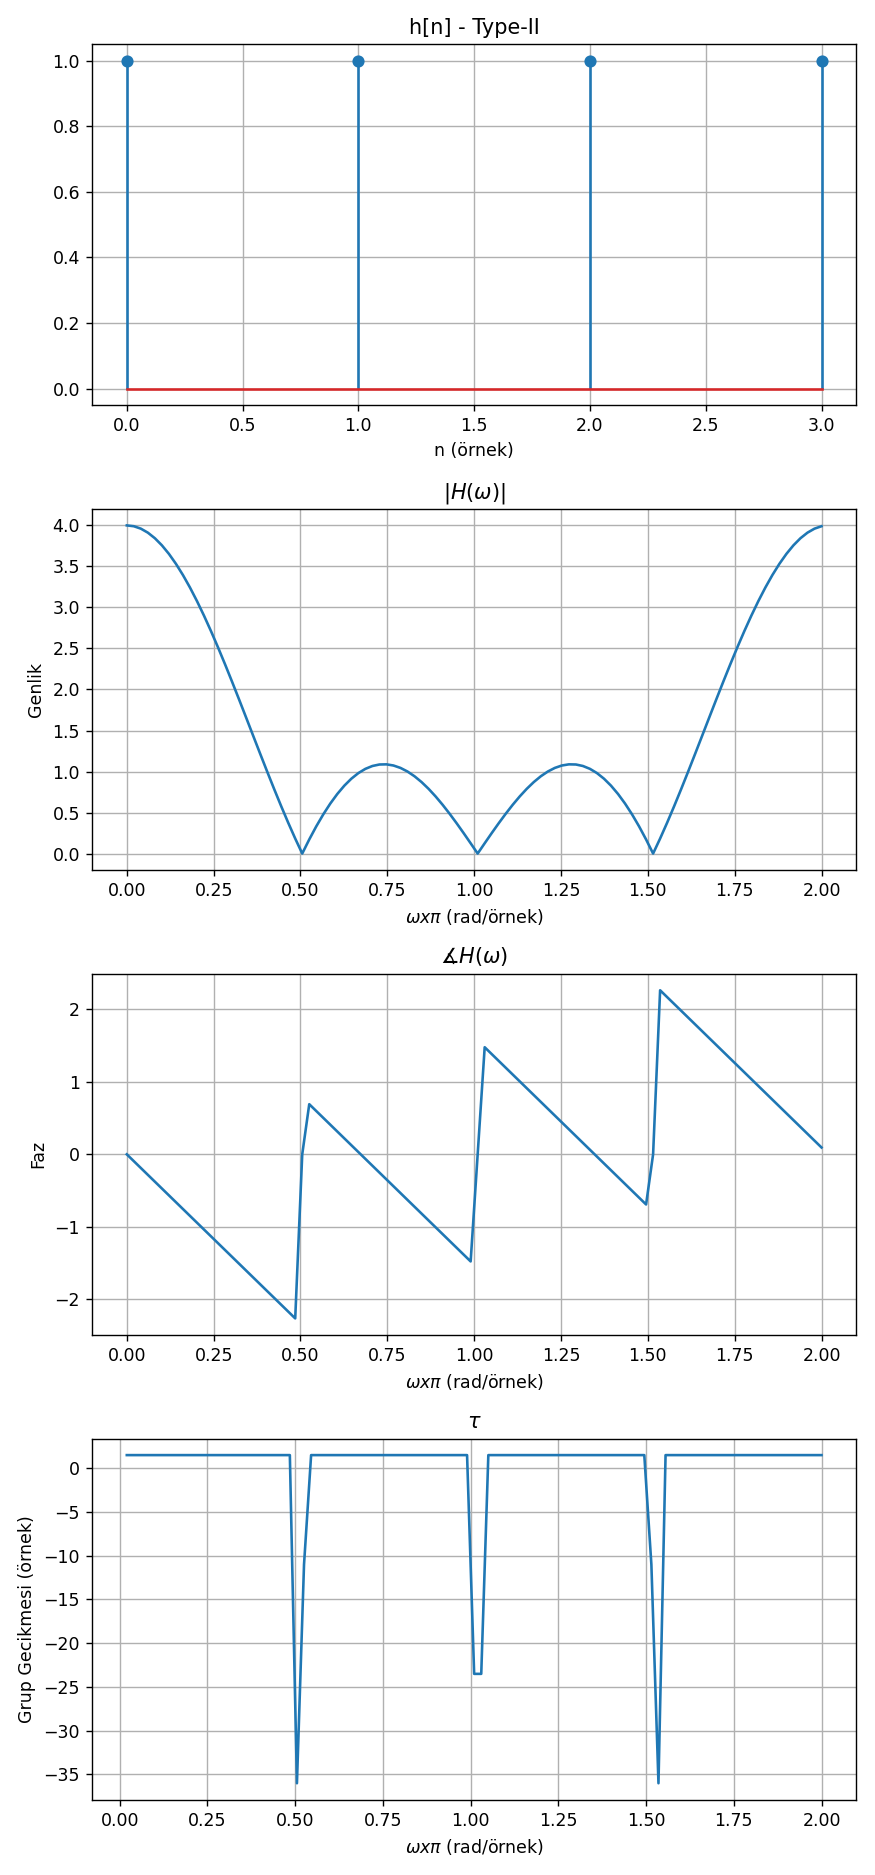

In [7]:
# grafiklerin çizdirilmesi
plt.figure(figsize=(7, 15)) # yeni figür

plt.subplot(4, 1, 1) # h[n]
plt.title('h[n] - Type-II'), plt.xlabel('n (örnek)'), plt.stem(n_2, h_2), plt.grid()

plt.subplot(4, 1, 2) # genlik
plt.title('$|H(\omega)|$'), plt.ylabel('Genlik'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w/pi, Hw_2_abs), plt.grid()

plt.subplot(4, 1, 3) # faz
plt.title('$\measuredangle H(\omega)$'), plt.ylabel('Faz'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w/pi, Hw_2_phs), plt.grid()

plt.subplot(4, 1, 4) # grup gecikmesi
plt.title('$\\tau$'), plt.ylabel('Grup Gecikmesi (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w[1::]/pi, T_w2), plt.grid() 

plt.tight_layout()
plt.show()

Genliğe bakıldığında, Type-I'de olduğu gibi ($-\pi, \pi$) aralığında BPF olarak çalışabilir fakat yüksek frekans değeri olan $\omega = \pi$'de işaretin genliği sıfırdır yani yüksek frekans bastırılmıştır. Dolayısıyla HPF ve BSF olarak çalışamaz. Derste verilen tabloya göre de HPF ve BSF olarak kullanılamayacağı bilinmektedir. Bu Type-II filtesi için ($0, \pi$) aralığı incelendiğinde LPF olarak çalıştığı görülmektedir.

Filtrenin fazının lineer olduğu grafikten görülmektedir. Bazı noktalarda grup gecikmesinin sabitliğinin bozulduğu görülmektedir. Bunun sebebi o noktalarda fazın eğiminin değişmesidir fakat genele bakıldığında grup gecikmesi sabit olup 1.5 örnek olduğu görülmektedir.

<IPython.core.display.Javascript object>


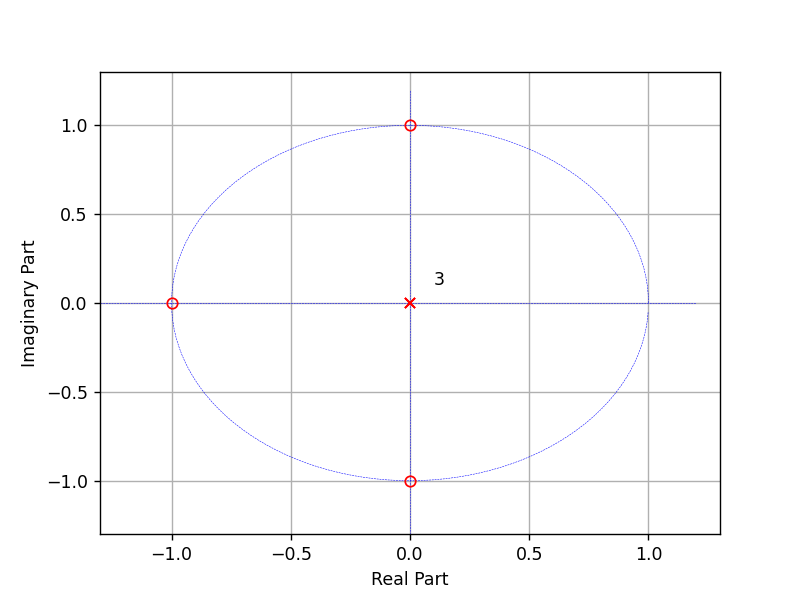

In [8]:
# kutup-sıfır diyagramı
zplane.zplane(h_2, 1)

z = -1 noktasında sıfırı vardır. -1 noktası $\pi$ değerine karşılık gelmektedir dolayısıyla $\pi$ frekans değerindeki işaret yani yüksek frekanstaki işaret bastırılır. Bu sebeple HPF olarak kullanılamaz. Aynı sebepten dolayı BSP olarak da kullanılamaz.

### Type-III

In [9]:
# M tek sayı olmalı
# M = 4 => n = 0, 1, 2, 3, 4 => h[n] 5 elemanlı
h_3 = np.array([-1, 1, 0, -1, 1])    # 5 örnek her birinin genliği 1
n_3 = np.arange(0, 5)

# Fourier Transform
Hw_3 = fft(h_3, N)

Hw_3_abs = abs(Hw_3)                 # genlik
Hw_3_phs = np.unwrap(np.angle(Hw_3)) # faz
T_w3 = -np.diff(Hw_3_phs)*(N/(2*pi)) # grup gecikmesi

<IPython.core.display.Javascript object>


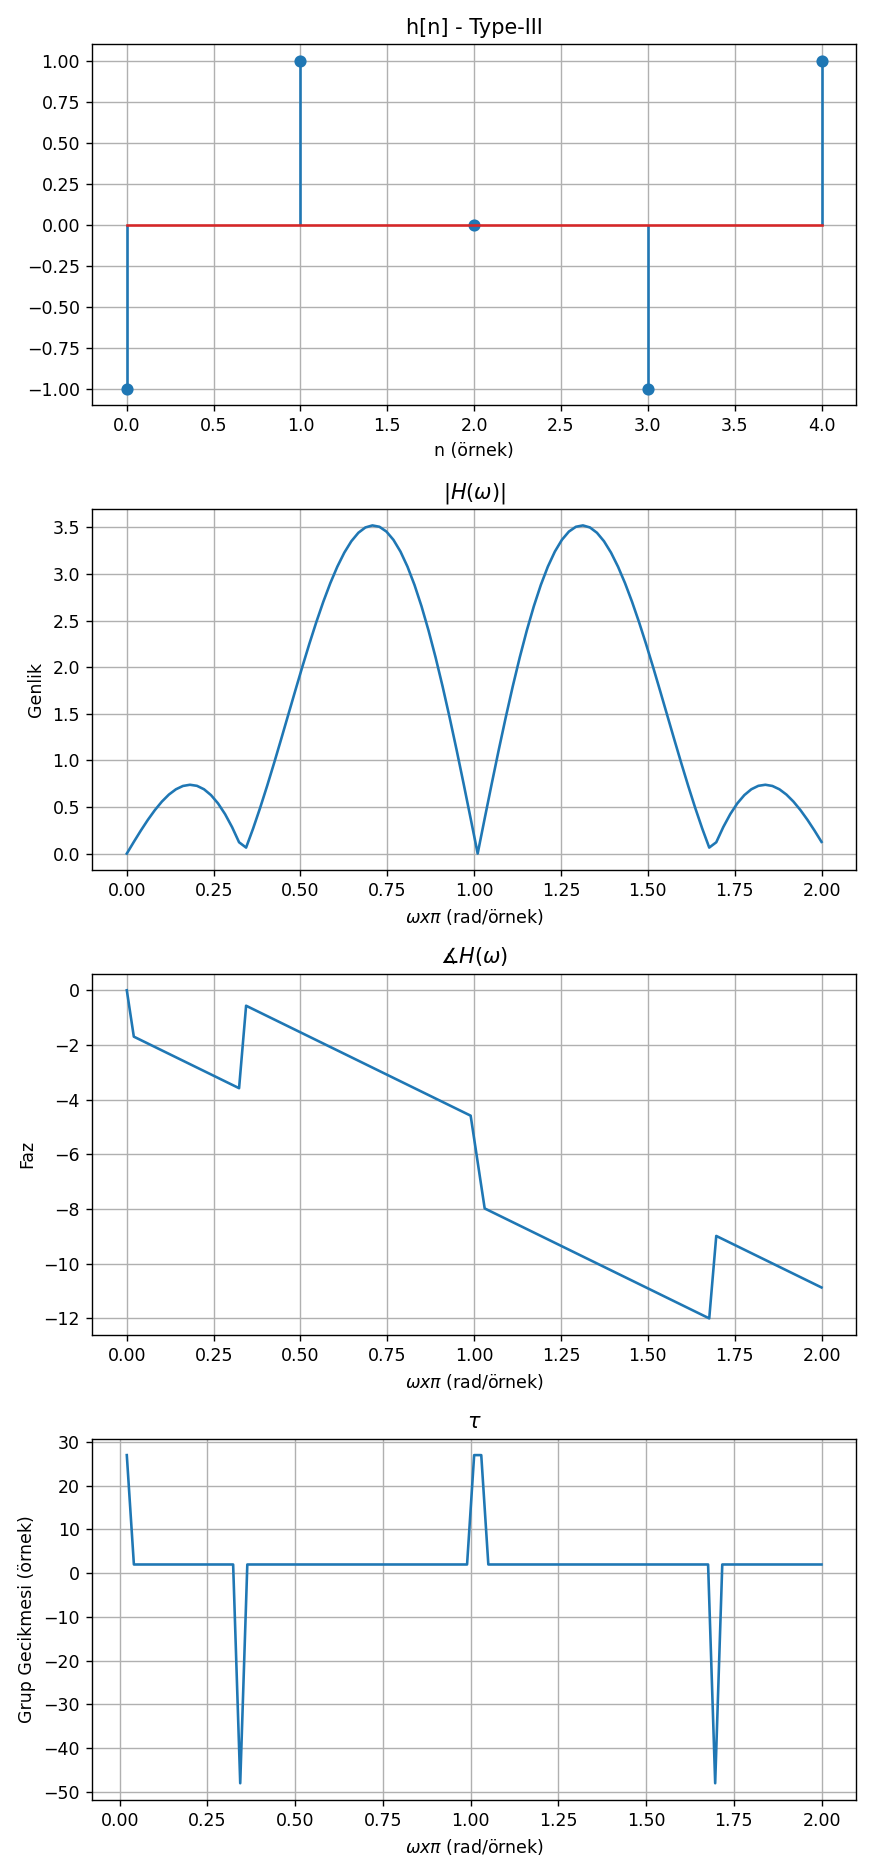

In [10]:
# grafiklerin çizdirilmesi
plt.figure(figsize=(7, 15)) # yeni figür

plt.subplot(4, 1, 1) # h[n]
plt.title('h[n] - Type-III'), plt.xlabel('n (örnek)'), plt.stem(n_3, h_3), plt.grid()

plt.subplot(4, 1, 2) # genlik
plt.title('$|H(\omega)|$'), plt.ylabel('Genlik'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w/pi, Hw_3_abs), plt.grid()

plt.subplot(4, 1, 3) # faz
plt.title('$\measuredangle H(\omega)$'), plt.ylabel('Faz'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w/pi, Hw_3_phs), plt.grid()

plt.subplot(4, 1, 4) # grup gecikmesi
plt.title('$\\tau$'), plt.ylabel('Grup Gecikmesi (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w[1::]/pi, T_w3), plt.grid() 

plt.tight_layout()
plt.show()

Genliğe bakıldığında, hem alçak frekanstaki ($\omega = 0$) hem de yüksek frekanstaki ($\omega = \pi$) işaretin bastırıldığı görülmektedir. Öyleyse LPF ve HPF olamayacağı görülmektedir. BSF da olamaz çünkü BSF sadece alçak ve yüksek frekanstaki işaretleri geçirir. Geriye sadece BPF kalıyor. Genliğe bakarak filtrenin BPF olarak çalıştığı görülmektedir. Bu da derste verilen bilgiye uymaktadır.

Filtrenin fazının lineer olduğu grafikten görülmektedir. Bazı noktalarda grup gecikmesinin sabitliğinin bozulduğu görülmektedir. Bunun sebebi o noktalarda fazın eğiminin değişmesidir fakat genele bakıldığında grup gecikmesi sabit olup 2 örnek olduğu görülmektedir.

<IPython.core.display.Javascript object>


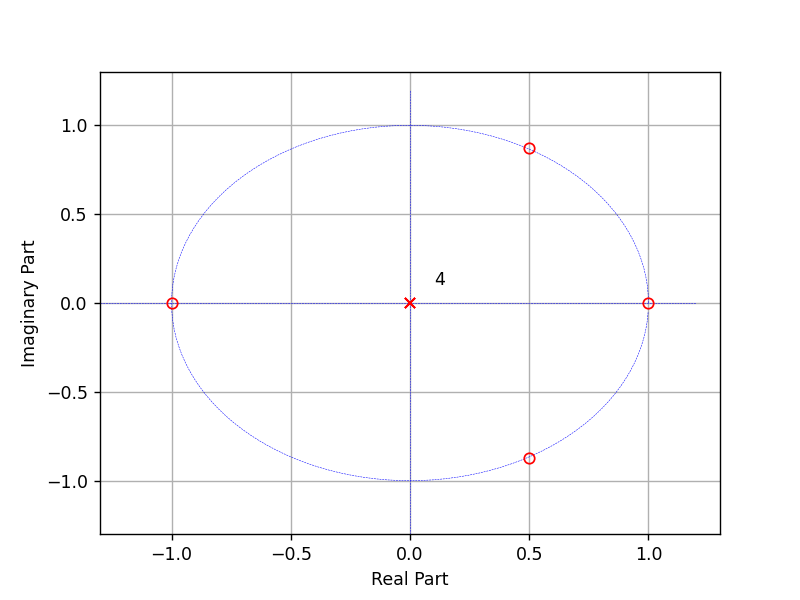

In [11]:
# kutup-sıfır diyagramı
zplane.zplane(h_3, 1)

z = $\pm 1$ noktasında sıfırı vardır. -1 noktası  𝜋  değerine, 1 noktası 0 değerine karşılık gelmektedir dolayısıyla  𝜋 ve 0 frekans değerlerindeki yani hem alçak hem de yüksek frekanstaki işaretler bastırılır. Bu sebeple HPF ve LPS olarak kullanılamaz. Aynı sebepten dolayı BSF olarak da kullanılamaz.

### Type-IV

In [12]:
# Type-IV
# M tek sayı olmalı
# M = 3 => n = 0, 1, 2, 3 => h[n] 4 elemanlı
h_4 = np.array([1,  -1, 1, -1])      # 5 örnek her birinin genliği 1
n_4 = np.arange(0, 4)

# Fourier Transform
Hw_4 = fft(h_4, N)

Hw_4_abs = abs(Hw_4)                 # genlik
Hw_4_phs = np.unwrap(np.angle(Hw_4)) # faz
T_w4 = -np.diff(Hw_4_phs)*(N/(2*pi)) # grup gecikmesi

<IPython.core.display.Javascript object>


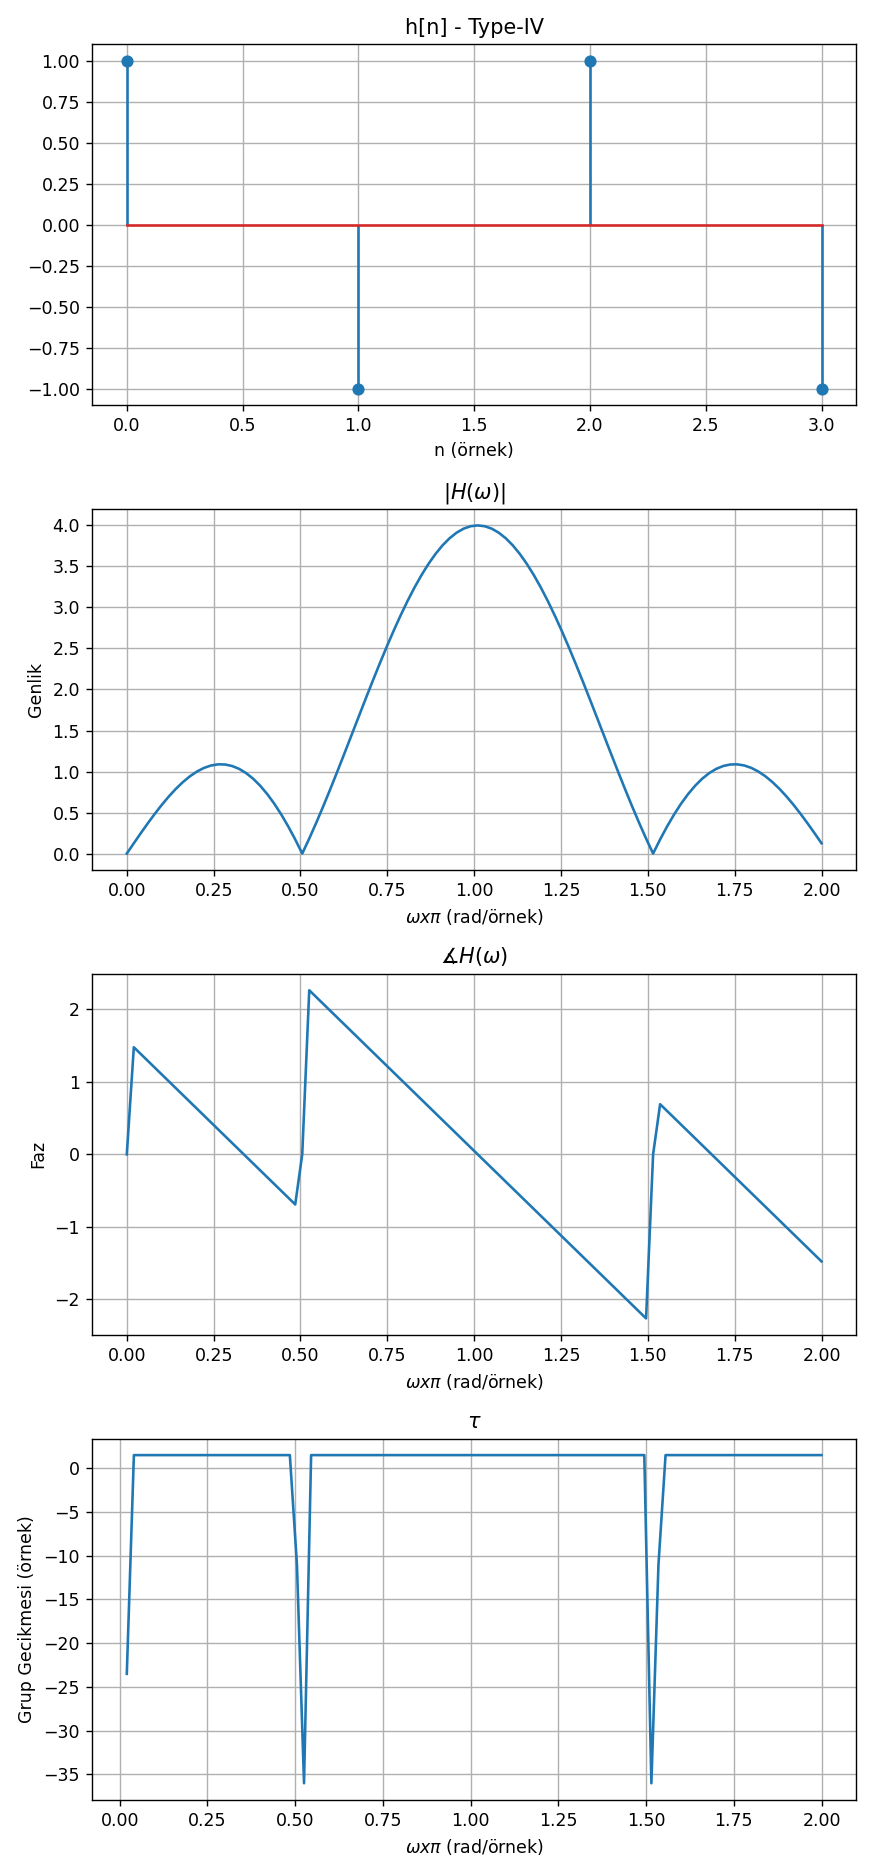

In [13]:
# grafiklerin çizdirilmesi
plt.figure(figsize=(7, 15)) # yeni figür

plt.subplot(4, 1, 1) # h[n]
plt.title('h[n] - Type-IV'), plt.xlabel('n (örnek)'), plt.stem(n_4, h_4), plt.grid()

plt.subplot(4, 1, 2) # genlik
plt.title('$|H(\omega)|$'), plt.ylabel('Genlik'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w/pi, Hw_4_abs), plt.grid()

plt.subplot(4, 1, 3) # faz
plt.title('$\measuredangle H(\omega)$'), plt.ylabel('Faz'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w/pi, Hw_4_phs), plt.grid()

plt.subplot(4, 1, 4) # grup gecikmesi
plt.title('$\\tau$'), plt.ylabel('Grup Gecikmesi (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)'), plt.plot(w[1::]/pi, T_w4), plt.grid() 

plt.tight_layout()
plt.show()

Genliğe bakıldığında, alçak frekans ($\omega=0$) değerinde işaretin 0 olduğu görülmektedir. Dolayısıyla alçak frekans bastırılmaktadır fakat yüksek frekans($\omega = \pi$) bastırılmamıştır yani filtre HPF olarak çalışabilir fakat LPF olarak çalışamaz. Alçak frekans bastırıldığı için BSF olarak da çalışamaz. Bu örnek için BPF olarak da çalışamaz fakat h[n] = {1, 1, -1, -1} olarak ayarlandığında yüksek frekans da sıfırlandığı için BPF olarak çalıştığı görüldü. Bu Type-IV filtresinin ($0, \pi$) aralığında HPF olarak çalıştığı görülmektedir. Derste elde edilen bilgiler sonucu bu filtre tipinin LPF ve BSF olarak kullanılamayacağı biliniyordu dolayısıyla çelişen bir sonuç elde edilmemiştir.

Filtrenin fazının lineer olduğu grafikten görülmektedir. Bazı noktalarda grup gecikmesinin sabitliğinin bozulduğu görülmektedir. Bunun sebebi o noktalarda fazın eğiminin değişmesidir fakat genele bakıldığında grup gecikmesi sabit olup 1.5 örnek olduğu görülmektedir.

<IPython.core.display.Javascript object>


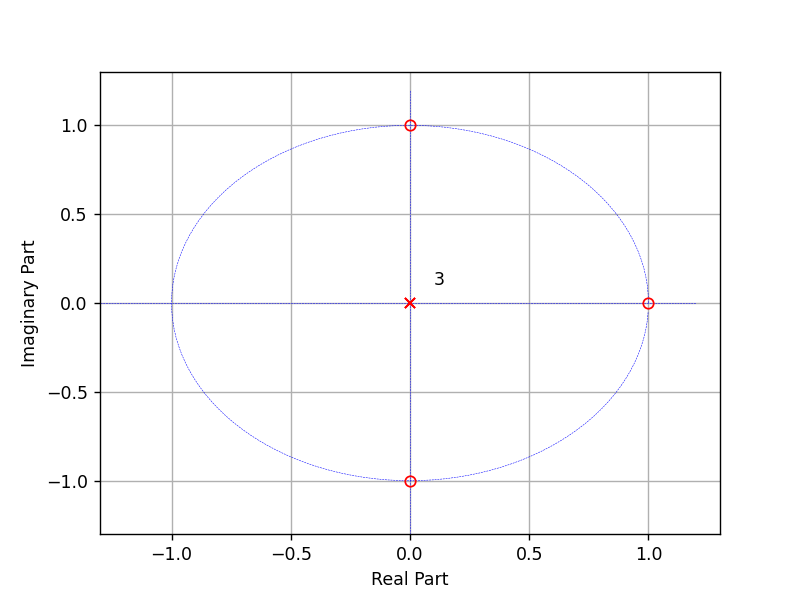

In [14]:
# kutup-sıfır diyagramı
zplane.zplane(h_4, 1)

z = 1 noktasında sıfırı vardır. 1 noktası 0 değerine karşılık gelmektedir dolayısıyla al.ak frekans değerindeki işaret bastırılır. Alçak frekans değerini bastırdığı için LPF ve BSF olarak kullanılamaz.

## SORU-2

**BPF**: $F_{SB}=0.1$, $F_{PB}=0.15$, $F_{PB2}=0.3$, $F_{SB2}=0.35$, (Frekans = $f_s$) $\\$
1- Equiripple ile$$\\$$
$ N = 100$

2- Windowed FIR (Hamming) ile $\\$
$F_{C1} = 0.15$, $F_{C2}=0.3$
$\\\N = 100$

In [15]:
# Equiripple BPF
filter_data = loadmat('FIR_BP_E.mat')  # filtre bilgileri yüklendi
coeffs = filter_data['ba'].astype(float)     # katsayılar alınıp float forma çevrildi

b_b1 = coeffs[0, :]  # filtre FIR olduğu için sadece b katsayıları alındı

w, H_b1 = sgnl.freqz(b_b1)  # omega ve frekans cevabı elde edildi

H_b1_abs = abs(H_b1)                  # genlik
H_b1_phs = np.unwrap(np.angle(H_b1))  # faz
T_wb1 = -np.diff(H_b1_phs)*(N/(2*pi)) # grup gecikmesi

In [16]:
# Windowed BPF
filter_data = loadmat('FIR_BP_W.mat')  # filtre bilgileri yüklendi
coeffs = filter_data['ba'].astype(float)   # katsayılar alınıp float forma çevrildi

b_b2 = coeffs[0, :]  # filtre FIR olduğu için sadece b katsayıları alındı

w, H_b2 = sgnl.freqz(b_b2)  # omega ve frekans cevabı elde edildi

H_b2_abs = abs(H_b2)                  # genlik
H_b2_phs = np.unwrap(np.angle(H_b2))  # faz
T_wb2 = -np.diff(H_b2_phs)*(N/(2*pi)) # grup gecikmesi

<IPython.core.display.Javascript object>


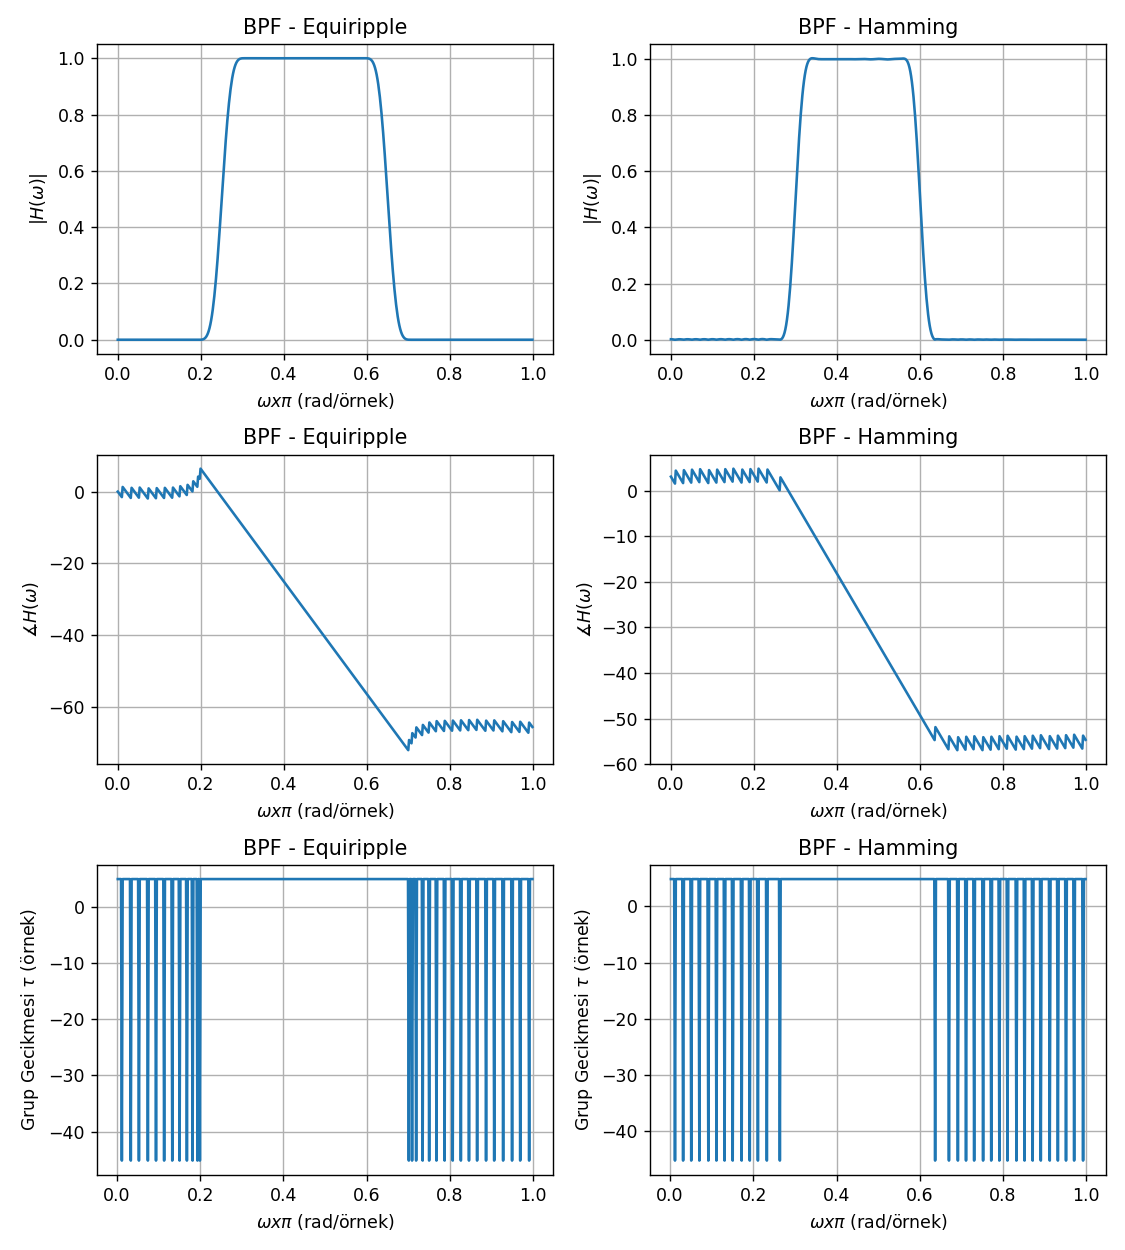

In [17]:
# grafiklerin çizdirilmesi
plt.figure(figsize=(9, 10)) # yeni figür

# Equiripple BPF
plt.subplot(3, 2, 1) # genlik
plt.title('BPF - Equiripple'), plt.ylabel('$|H(\omega)|$'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w/pi, H_b1_abs), plt.grid()

plt.subplot(3, 2, 3) # faz
plt.title('BPF - Equiripple'), plt.ylabel('$\measuredangle H(\omega)$'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w/pi, H_b1_phs), plt.grid()

plt.subplot(3, 2, 5) # grup gecikmesi
plt.title('BPF - Equiripple'), plt.ylabel('Grup Gecikmesi $\\tau$ (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w[1::]/pi, T_wb1), plt.grid() 

# Windowed BPF
plt.subplot(3, 2, 2) # genlik
plt.title('BPF - Hamming'), plt.ylabel('$|H(\omega)|$'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w/pi, H_b2_abs), plt.grid()

plt.subplot(3, 2, 4) # faz
plt.title('BPF - Hamming'), plt.ylabel('$\measuredangle H(\omega)$'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w/pi, H_b2_phs), plt.grid()

plt.subplot(3, 2, 6) # grup gecikmesi
plt.title('BPF - Hamming'), plt.ylabel('Grup Gecikmesi $\\tau$ (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w[1::]/pi, T_wb2), plt.grid() 

plt.tight_layout()
plt.show()

Band geçiren FIR filtreler incelendiğinde, her iki yöntemle oluşturulan filtrenin de geçirme bölgesinde fazlarının lineer olduğı ve grup gecikmesinin 50 örnek olduğu görüldü. Öyleyse her iki band geçiren filtrenin de $\omega$ değeri $0.3\pi - 0.6\pi$ arasında olan işaretleri 50 örnek geciktirerek geçirmesi, diğer $\omega$ değerlerindeki işaretleri ise filtrelemesi beklenmektedir.

**LPF**: $F_{PB}=0.15$, $F_{SB}=0.2$ (Frekans = $f_s$) $\\$
1- Equiripple ile $$\\$$
$ N = 100$

2- Windowed FIR (Hamming) ile $\\$
$N = 100$

In [18]:
# Equiripple LPF
filter_data = loadmat('FIR_LP_E.mat')     # filtre bilgileri yüklendi
coeffs = filter_data['ba'].astype(float)  # katsayılar alınıp float forma çevrildi

b_l1 = coeffs[0, :]  # filtre FIR olduğu için sadece b katsayıları alındı

w, H_l1 = sgnl.freqz(b_l1)            # omega ve frekans cevabı elde edildi

H_l1_abs = abs(H_l1)                  # genlik
H_l1_phs = np.unwrap(np.angle(H_l1))  # faz
T_wl1 = -np.diff(H_l1_phs)*(N/(2*pi)) # grup gecikmesi

In [19]:
# Windowed LPF
filter_data = loadmat('FIR_LP_W.mat')     # filtre bilgileri yüklendi
coeffs = filter_data['ba'].astype(float)  # katsayılar alınıp float forma çevrildi

b_l2 = coeffs[0, :]  # filtre FIR olduğu için sadece b katsayıları alındı

w, H_l2 = sgnl.freqz(b_l2)            # omega ve frekans cevabı elde edildi

H_l2_abs = abs(H_l2)                  # genlik
H_l2_phs = np.unwrap(np.angle(H_l2))  # faz
T_wl2 = -np.diff(H_l2_phs)*(N/(2*pi)) # grup gecikmesi

<IPython.core.display.Javascript object>


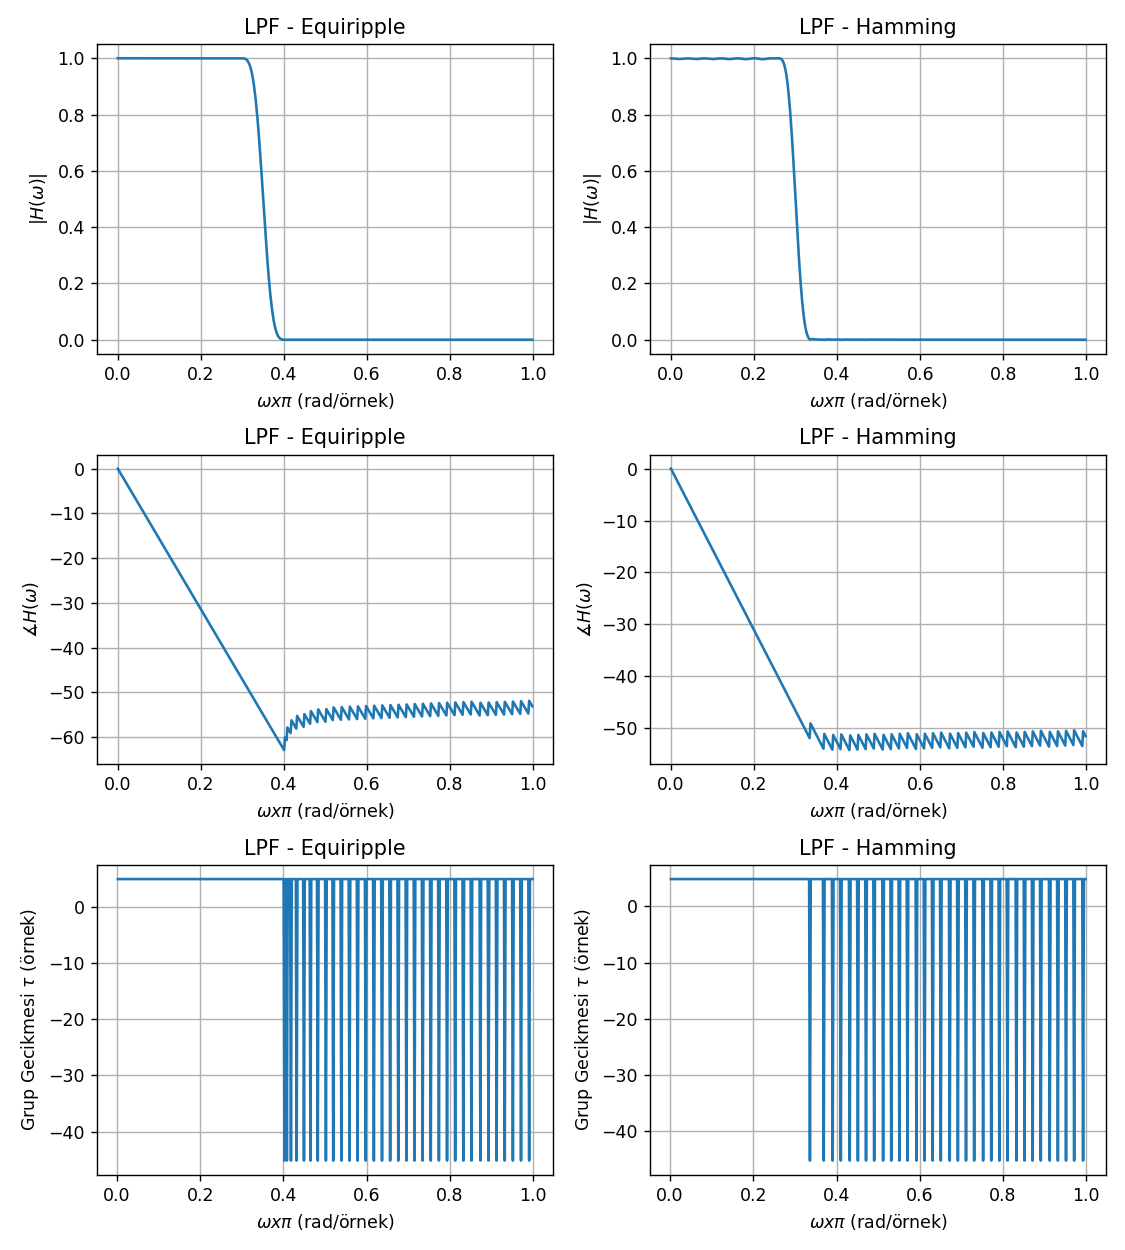

In [20]:
# grafiklerin çizdirilmesi
plt.figure(figsize=(9, 10)) # yeni figür

# Equiripple BPF
plt.subplot(3, 2, 1) # genlik
plt.title('LPF - Equiripple'), plt.ylabel('$|H(\omega)|$'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w/pi, H_l1_abs), plt.grid()

plt.subplot(3, 2, 3) # faz
plt.title('LPF - Equiripple'), plt.ylabel('$\measuredangle H(\omega)$'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w/pi, H_l1_phs), plt.grid()

plt.subplot(3, 2, 5) # grup gecikmesi
plt.title('LPF - Equiripple'), plt.ylabel('Grup Gecikmesi $\\tau$ (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w[1::]/pi, T_wl1), plt.grid() 

# Windowed BPF
plt.subplot(3, 2, 2) # genlik
plt.title('LPF - Hamming'), plt.ylabel('$|H(\omega)|$'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w/pi, H_l2_abs), plt.grid()

plt.subplot(3, 2, 4) # faz
plt.title('LPF - Hamming'), plt.ylabel('$\measuredangle H(\omega)$'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w/pi, H_l2_phs), plt.grid()

plt.subplot(3, 2, 6) # grup gecikmesi
plt.title('LPF - Hamming'), plt.ylabel('Grup Gecikmesi $\\tau$ (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w[1::]/pi, T_wl2), plt.grid() 

plt.tight_layout()
plt.show()

Alçak geçiren FIR filtreler incelendiğinde, yine geçirme bölgesinde her ikisinin de fazının lineer olduğu, bu sebeple grup gecikmelerinin sabit olup yine 50 örnek olduğu grafiklerden görülmektedir. Öyleyse band geçiren filtredekine benzer şekilde geçirme frekansındaki ($\omega=(0-0.3\pi)$ arasındaki) işaretleri 50 örnek gecikmeyle geçirirken, diğer $\omega$ değerindeki işaretleri filtrelemesi beklenmektedir.

## SORU-3

**HPF**: $F_{C}=0.35$, $F_{SB}=0.15$, $F_{PB}=0.35$ (Frekans = $f_s$) $\\$
1- Butterworth ile $$\\$$
$ N = 25 $

2- Chebyshev-II ile $\\$
$N = 25 $

In [21]:
# Butterworth ile HPF
filter_data = loadmat('IIR_HP_B.mat')     # filtre bilgileri yüklendi
coeffs = filter_data['ba'].astype(float)  # katsayılar alınıp float forma çevrildi

b_h1 = coeffs[0, :]  
a_h1 = coeffs[1, :]  

w, H_h1 = sgnl.freqz(b_h1, a_h1)      # omega ve frekans cevabı elde edildi

H_h1_abs = abs(H_h1)                  # genlik
H_h1_phs = np.unwrap(np.angle(H_h1))  # faz
T_wh1 = -np.diff(H_h1_phs)*(N/(2*pi)) # grup gecikmesi

In [22]:
# Chebyshev-II ile HPF
filter_data = loadmat('IIR_HP_C.mat')     # filtre bilgileri yüklendi
coeffs = filter_data['ba'].astype(float)  # katsayılar alınıp float forma çevrildi

b_h2 = coeffs[0, :]  
a_h2 = coeffs[1, :]  

w, H_h2 = sgnl.freqz(b_h2, a_h2)      # omega ve frekans cevabı elde edildi

H_h2_abs = abs(H_h2)                  # genlik
H_h2_phs = np.unwrap(np.angle(H_h2))  # faz
T_wh2 = -np.diff(H_h2_phs)*(N/(2*pi)) # grup gecikmesi

<IPython.core.display.Javascript object>


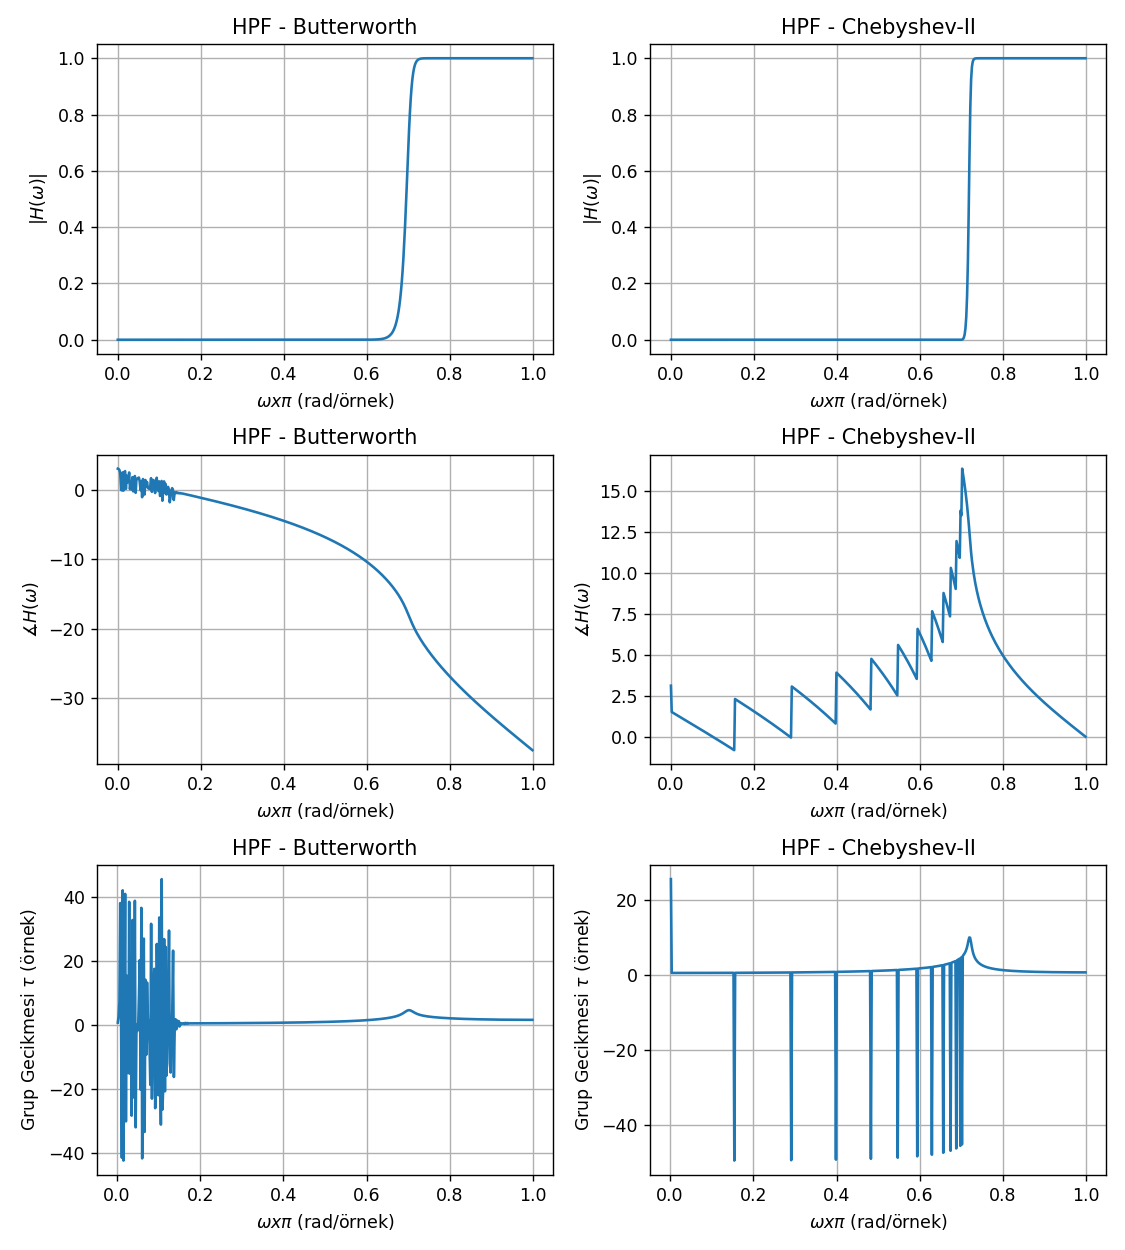

In [23]:
# grafiklerin çizdirilmesi
plt.figure(figsize=(9, 10)) # yeni figür

# Equiripple BPF
plt.subplot(3, 2, 1) # genlik
plt.title('HPF - Butterworth'), plt.ylabel('$|H(\omega)|$'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w/pi, H_h1_abs), plt.grid()

plt.subplot(3, 2, 3) # faz
plt.title('HPF - Butterworth'), plt.ylabel('$\measuredangle H(\omega)$'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w/pi, H_h1_phs), plt.grid()

plt.subplot(3, 2, 5) # grup gecikmesi
plt.title('HPF - Butterworth'), plt.ylabel('Grup Gecikmesi $\\tau$ (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w[1::]/pi, T_wh1), plt.grid() 

# Windowed BPF
plt.subplot(3, 2, 2) # genlik
plt.title('HPF - Chebyshev-II'), plt.ylabel('$|H(\omega)|$'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w/pi, H_h2_abs), plt.grid()

plt.subplot(3, 2, 4) # faz
plt.title('HPF - Chebyshev-II'), plt.ylabel('$\measuredangle H(\omega)$'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w/pi, H_h2_phs), plt.grid()

plt.subplot(3, 2, 6) # grup gecikmesi
plt.title('HPF - Chebyshev-II'), plt.ylabel('Grup Gecikmesi $\\tau$ (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w[1::]/pi, T_wh2), plt.grid() 

plt.tight_layout()
plt.show()

IIR yüksek geçiren filtreleri incelendiğinde, geçirme bölgesinde fazlarının lineer olmadığı görülmektedir. Derste edilen bilgilerden de fazlarının lineer olmaması beklenmekteydi. Bu sebeple grup gecikmesi de sabit değildir. $\omega$ değeri $0.7\pi-\pi$ arasında olduğu için bu aralıktaki işaretleri geçirirken diğerler frekans değerlerindeki işaretleri filtrelemesi fakat grup gecikmesi sabit olmadığı için filtrelenmeyen işaret çıkışa aktarıldığında bir miktar bozulmanın meydana gelmesi beklenmektedir.

Butterworth ve Chebyshew-II filtresindeki $\omega=0.7\pi$ değerindeki $\tau \approx 5 $ örnektir fakat Butterworth filtresindeki grup gecikme değeri bu noktadan sonra azalırken, Chebyshew-II filtresi $\omega=0.71\pi$ değerinde $\tau = 10$ örnek gecikmeye sahiptir. Grup gecikmelerindeki farklılıktan dolayı çıkışta elde edilen sinyaldeki bozulmaların farklı olması beklenmektedir.

**LPF**: $F_{C}=0.15$ (Frekans = $f_s$) $\\$
1- Butterworth ile $$\\$$
$ N = 25$

2- Chebyshev-II ile$\\$
$N = 25$

In [24]:
# Butterworth ile LPF
filter_data = loadmat('IIR_LP_B.mat')  # filtre bilgileri yüklendi
coeffs = filter_data['ba'].astype(float)     # katsayılar alınıp float forma çevrildi

b_l21 = coeffs[0, :]  
a_l21 = coeffs[1, :]  

w, H_l21 = sgnl.freqz(b_l21, a_l21)     # omega ve frekans cevabı elde edildi

H_l21_abs = abs(H_l21)                  # genlik
H_l21_phs = np.unwrap(np.angle(H_l21))  # faz
T_wl21 = -np.diff(H_l21_phs)*(N/(2*pi)) # grup gecikmesi

In [25]:
# Chebyshev-II ile LPF
filter_data = loadmat('IIR_LP_C.mat')  # filtre bilgileri yüklendi
coeffs = filter_data['ba'].astype(float)     # katsayılar alınıp float forma çevrildi

b_l22 = coeffs[0, :]  
a_l22 = coeffs[1, :]  

w, H_l22 = sgnl.freqz(b_l22, a_l22)     # omega ve frekans cevabı elde edildi

H_l22_abs = abs(H_l22)                  # genlik
H_l22_phs = np.unwrap(np.angle(H_l22))  # faz
T_wl22 = -np.diff(H_l22_phs)*(N/(2*pi)) # grup gecikmesi

<IPython.core.display.Javascript object>


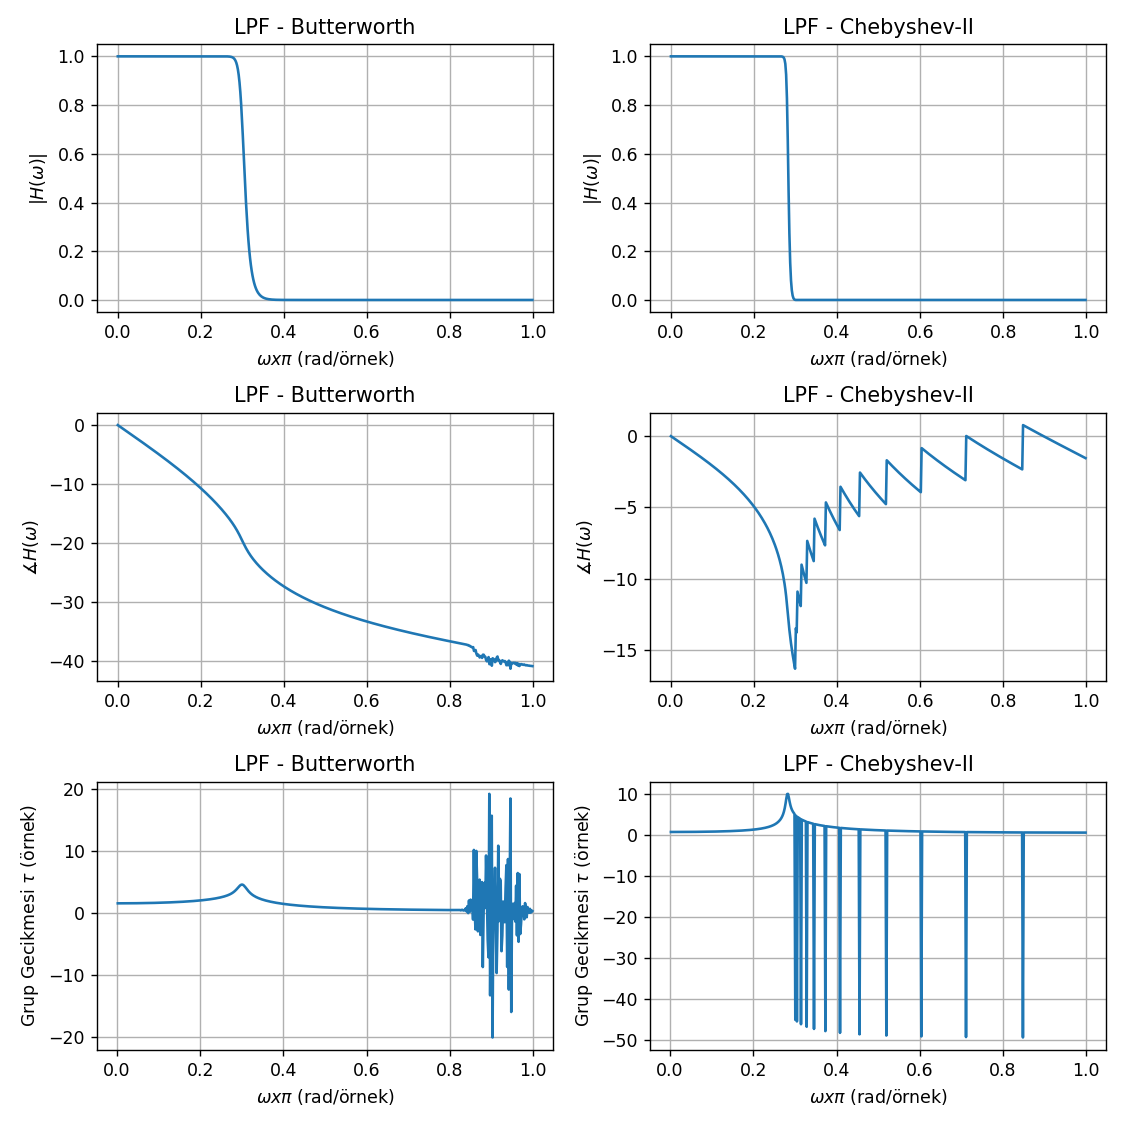

In [26]:
# grafiklerin çizdirilmesi
plt.figure(figsize=(9, 9)) # yeni figür

# Equiripple LPF
plt.subplot(3, 2, 1) # genlik
plt.title('LPF - Butterworth'), plt.ylabel('$|H(\omega)|$'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w/pi, H_l21_abs), plt.grid()

plt.subplot(3, 2, 3) # faz
plt.title('LPF - Butterworth'), plt.ylabel('$\measuredangle H(\omega)$'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w/pi, H_l21_phs), plt.grid()

plt.subplot(3, 2, 5) # grup gecikmesi
plt.title('LPF - Butterworth'), plt.ylabel('Grup Gecikmesi $\\tau$ (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w[1::]/pi, T_wl21), plt.grid() 

# Windowed BPF
plt.subplot(3, 2, 2) # genlik
plt.title('LPF - Chebyshev-II'), plt.ylabel('$|H(\omega)|$'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w/pi, H_l22_abs), plt.grid()

plt.subplot(3, 2, 4) # faz
plt.title('LPF - Chebyshev-II'), plt.ylabel('$\measuredangle H(\omega)$'), plt.xlabel('$\omega x\pi$ (rad/örnek)') 
plt.plot(w/pi, H_l22_phs), plt.grid()

plt.subplot(3, 2, 6) # grup gecikmesi
plt.title('LPF - Chebyshev-II'), plt.ylabel('Grup Gecikmesi $\\tau$ (örnek)'), plt.xlabel('$\omega x\pi$ (rad/örnek)')
plt.plot(w[1::]/pi, T_wl22), plt.grid() 

plt.tight_layout()
plt.show()

IIR alçak geçiren filtreleri incelendiğinde, geçirme bölgesinde fazlarının lineer olmadığı görülmektedir. Derste edilen bilgilerden de IIR filtre oldukarı için fazlarının lineer olmaması beklenmekteydi. Bu sebeple grup gecikmesi de sabit değildir. $\omega$ değeri $0-0.3\pi$ arasında olan işaretleri geçirirken diğerler frekans değerlerindeki işaretleri filtrelemesi fakat grup gecikmesi sabit olmadığı için filtrelenmeyen işaret çıkışa aktarıldığında bir miktar bozulmanın meydana gelmesi beklenmektedir.

Grup gecikmelerinin Grafikleri geçirme bölgesinde birbirine benzese de, değerler birbirinden farklıdır. Bu sebeple çıkışta meydana gelecek bozulmaların da birbirinden farklı olması beklenmektedir.

## SORU-4

In [27]:
N = 400  # 400 noktada örnek alınacak
M = 60   # pencere boyu tanımlandı

n = np.arange(0, M+1, 1)       # M+1 noktadan oluşan index vektörü tanımlandı
wn = 0.54 - 0.46*cos(2*pi*n/M) # Hamming penceresi

# bileşenler tanımlandı
x1 = wn*cos(0.2*pi*n)
x2 = wn*cos(0.4*pi*n - pi/2)
x3 = wn*cos(0.8*pi*n - pi/5)

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis = None)

In [28]:
# FIR
y_b1 = sgnl.lfilter(b_b1, 1, xn)       # BP Equiripple
y_b2 = sgnl.lfilter(b_b2, 1, xn)       # BP Hamming
y_l1 = sgnl.lfilter(b_l1, 1, xn)       # LP Equiripple
y_l2 = sgnl.lfilter(b_l2, 1, xn)       # BP Hamming

# IIR
y_h1 = sgnl.lfilter(b_h1, a_h1, xn)    # HP Butterworth
y_h2 = sgnl.lfilter(b_h2, a_h2, xn)    # HP Chebyshev-II
y_l21 = sgnl.lfilter(b_l21, a_l21, xn) # LP Butterworth
y_l22 = sgnl.lfilter(b_l22, a_l22, xn) # LP Chebyshev_II

<IPython.core.display.Javascript object>


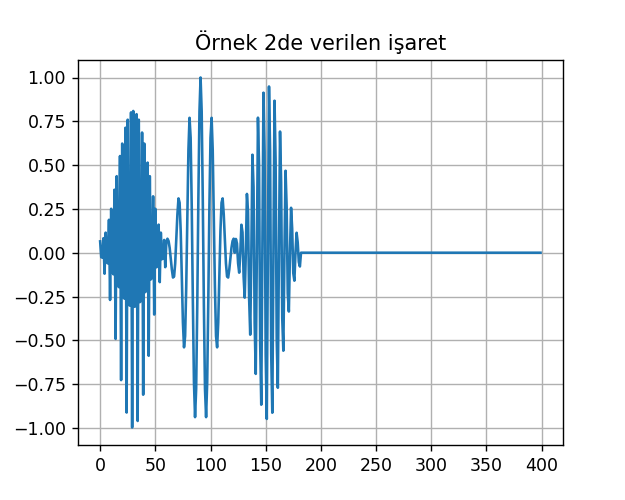

<IPython.core.display.Javascript object>


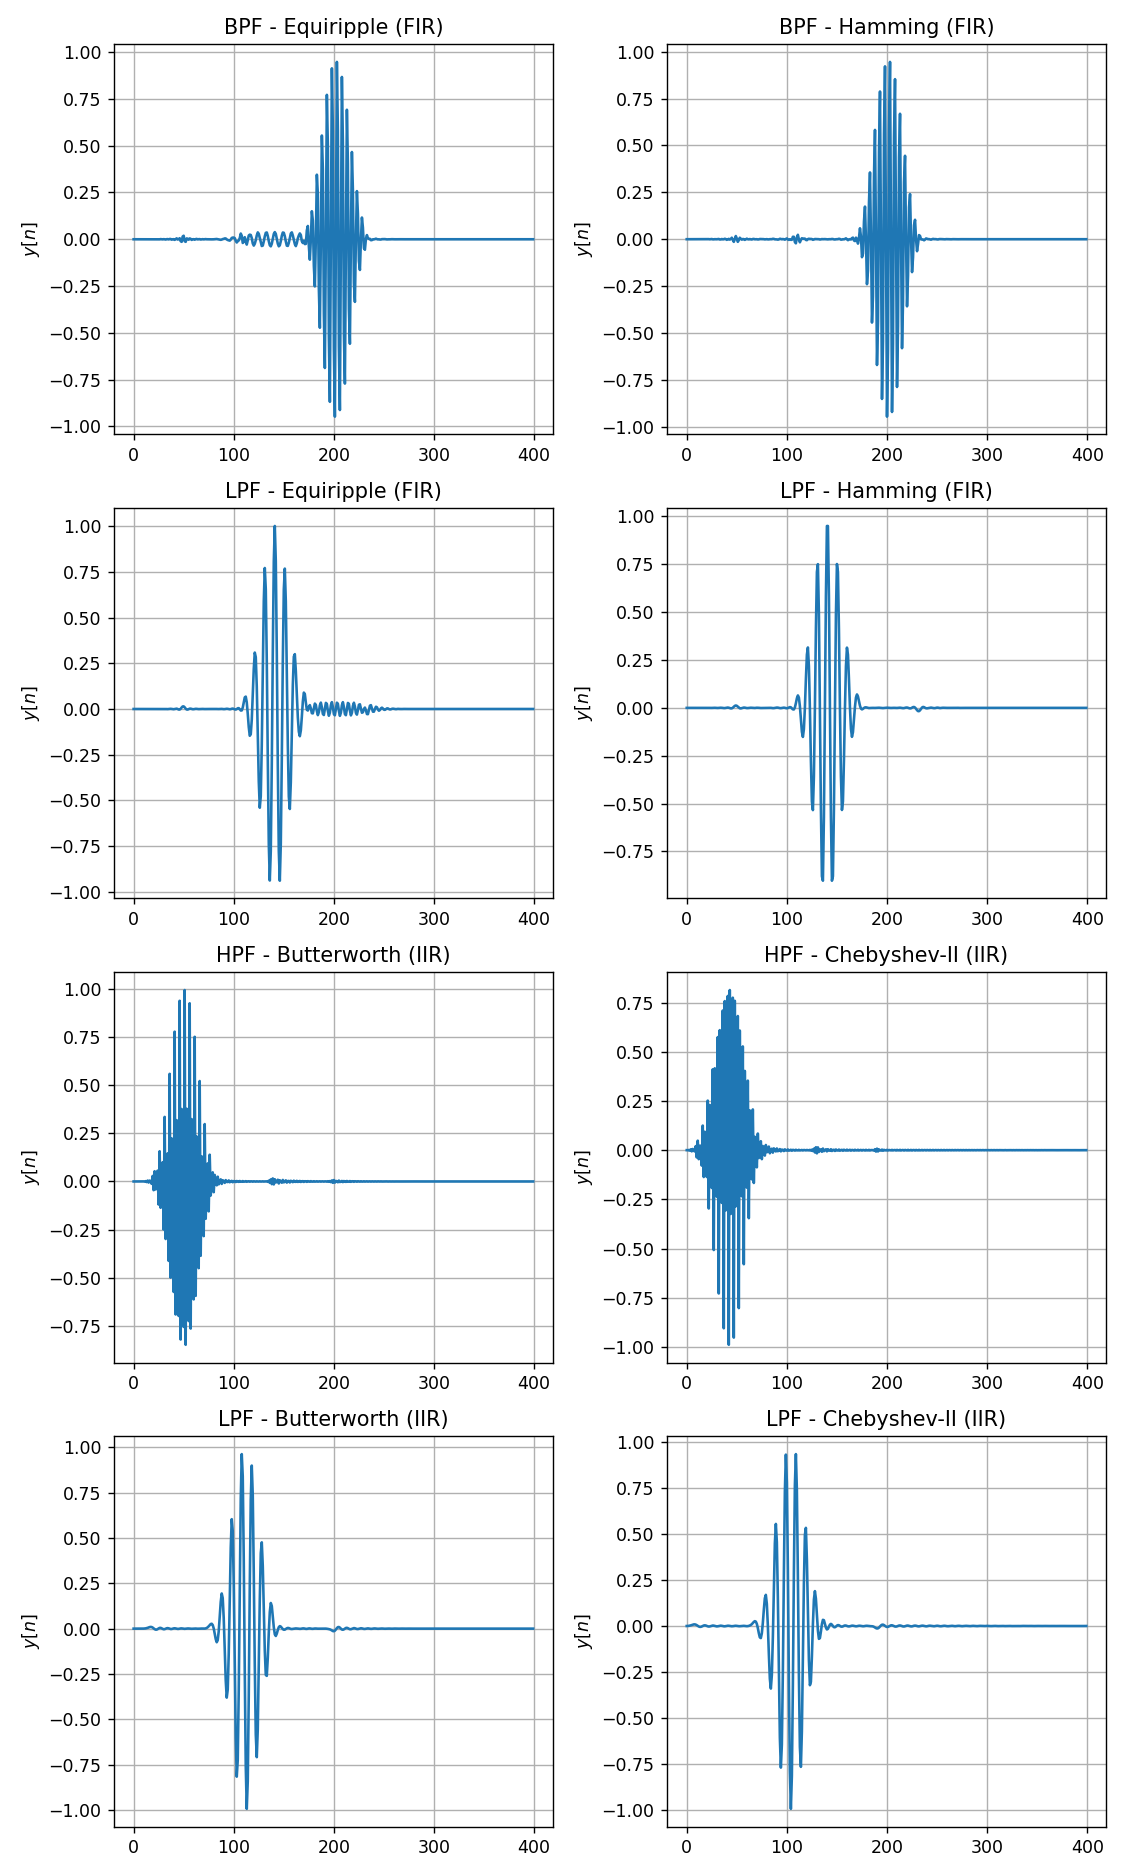

In [29]:
# grafiklerin çizdirilmesi
plt.figure(figsize = (5, 4))
plt.title('Örnek 2de verilen işaret'), plt.plot(xn), plt.grid()
plt.show()

plt.figure(figsize=(9, 15)) #yeni figür

# Equiripple BPF 
plt.subplot(4, 2, 1) # y_b1
plt.title('BPF - Equiripple (FIR)'), plt.ylabel('$y[n]$')
plt.plot(y_b1), plt.grid()

# Hamming BPF
plt.subplot(4, 2, 2) # y_b2
plt.title('BPF - Hamming (FIR)'), plt.ylabel('$y[n]$')
plt.plot(y_b2), plt.grid()

# Equiripple LPF 
plt.subplot(4, 2, 3) # y_l1
plt.title('LPF - Equiripple (FIR)'), plt.ylabel('$y[n]$') 
plt.plot(y_l1), plt.grid() 

# Hamming LPF
plt.subplot(4, 2, 4) # y_l2
plt.title('LPF - Hamming (FIR)'), plt.ylabel('$y[n]$')
plt.plot(y_l2), plt.grid()

# Butterworth HPF
plt.subplot(4, 2, 5) # y_h1
plt.title('HPF - Butterworth (IIR)'), plt.ylabel('$y[n]$')
plt.plot(y_h1), plt.grid()

# Chebychev-II HPF
plt.subplot(4, 2, 6) # y_h2
plt.title('HPF - Chebyshev-II (IIR)'), plt.ylabel('$y[n]$')
plt.plot(y_h2), plt.grid() 

# Butterworth LPF
plt.subplot(4, 2, 7) # y_l21
plt.title('LPF - Butterworth (IIR)'), plt.ylabel('$y[n]$')
plt.plot(y_l21), plt.grid() 

# Chebychev-II LPF
plt.subplot(4, 2, 8) # y_l22
plt.title('LPF - Chebyshev-II (IIR)'), plt.ylabel('$y[n]$')
plt.plot(y_l22), plt.grid() 

plt.tight_layout()
plt.show()

x1: $\omega = 0.2\pi$, x2: $\omega = 0.4\pi$ ve x3: $\omega = 0.8\pi$ değerine sahip. 

Çizdirilen grafikte x3 işareti ilk işaret olup frekansı en yüksek olandır. İkinci işaret x1, üçüncü işaret ise x2'dir. Alçak geçiren filtrelerin geçirme aralığı $\omega=0-0.3\pi$ olduğu için, x1 işareti hariç diğer işaretleri filtrelemesi, band geçiren filtrelerin geçirme aralığı $\omega=0.3-0.6\pi$ olduğu için x2 işaret hariç diğer işaretleri filtrelemesi ve son olarak yüksek geçiren filtrenin geçirme aralığı $\omega=0.7-\pi$ olduğu için x3 işaret hariç diğer işaretleri filtrelemesi beklenmektedir.

Band geçiren filtreler (lineer faza sahip) incelendiğinde, beklendiği gibi x2 işaretini geçirip diğer işaretleri filtrelediği fakat yine beklendiği gibi işaretin 50 örnek geciktiği gözlemlendi. Hamming (BP) filtresinin diğer işaretleri daha iyi filtrelediği fakat iki yöntem ile tasarlanan filtrenin de diğer işaretleri tamamen filtreleyemediği gözlemlendi.

Lineer faza sahip alçak geçiren filtreler incelendiğinde, her iki filtrenin de beklendiği gibi x1 işaretini geçirip diğerlerini filtrelediği fakat yine Hamming yöntemi ile tasarlanan filtrenin daha iyi filtrelediği ve her iki filtrede de işaretin beklendiği 50 örnek geciktiği gözlemlenlendi. Yine diğer işaretlerin tamamen filtrelenemeyip ufak rippleların olduğu görülmekte fakat band geçiren filtreye göre diğer işaretlerin daha iyi filtrelendiği gözlemlendi.

FIR filtrelerin dördünde de ilgili işaretler gecikmeli olarak fakat bozulma olmadan çıkışa aktarılmıştır.

IIR filtrelere bakıldığında, yüksek geçiren filtrelerde beklendiği gibi x3 işareti çıkışa aktarılırken diğer işaretler filtrelenmiştir. Tasarlanan FIR filtrelerine kıyasla toplam işaretin gecikmesi çok daha düşük olsa da grup gecikmesi sabit olmadığı için özellikle Butterworth filtresinde işaretin bozulduğu belirgin bir şekilde görülmektedir. Chebyshev-II filtresinin çıkışından elde edilen işaret daha düzgün durmaktadır fakat her iki işarette de bozulma vardır. Filtrelenen işaretlerden kaynaklanan ufak ripplelar neredeyse aynı gibi olup, FIR filtrelere göre rippleların genlikleri daha küçüktür, dolayısıyla daha iyi filtrelendikleri söylenebilir.

Alçak geçiren filtre yine beklendiği gibi x1 işaretini geçirip diğer işaretleri filtrelemiştir. Filtrelenen işaretlerden kaynaklanan ripplelar, tasarlanan Hamming FIR filtresindeki rippleların genliğiyle çok benzer durmaktadır. İşarette meydana gelen toplam gecikme yine tasarlanan FIR filtrelerine göre oldukça düşüktür fakat grup gecikmesi sabit olmadığı için yine her iki LP IIR filtresinde de bozulma meydana gelmiştir. Chebyshev-II filtresinin çıkışında elde edilen işaret, x1 işaretinin x eksenine göre yansıması gibidir. 

IIR filtrelerin dördü de gecikme açısından FIR filtrelere göre daha iyidir fakat işaret çıkışa bozularak aktarılmaktadır.

Derece arttıkça filtreler keskinleşeceğinden ideale yaklaşırlar fakat derecenin artması demek rippleların da artması demektir. IIR filtrelerde aynı işlemler FIR filtreye göre daha düşük derecelerle yapılabildiği için daha az gürültüye sahiptirler. Aynı zamanda filtre derecesi arttığında, gecikme de artmaktadır. 